In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Remember when using a url to read in a df, use the raw data. Must also change the encoding
#This dataset was taken from FiveThirtyEight's github repo
police_killings = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/police-killings/police_killings.csv',
                             encoding='ISO-8859-1')
police_killings.head(3)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312


In [14]:
#Taking a look at the shape of the data and the columns
print(police_killings.shape)

print(police_killings.columns)

(467, 34)
Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')


In [32]:
#Exploring the value counts by ethnicities
counts = police_killings['raceethnicity'].value_counts(normalize=True) #can add in a normalized paramter (normalize=True)

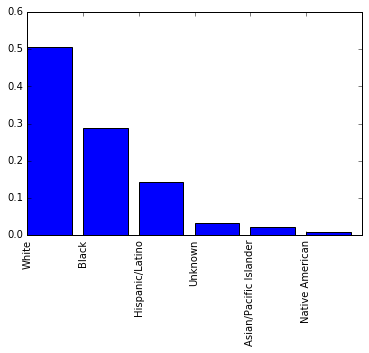

In [33]:
#Making a bar graph to show the frequency of killings by ethnicity (can also use percentages if normalized=True)
plt.bar(range(6),counts)
plt.xticks(range(6),counts.index,rotation='vertical')

plt.show()

From the above bar graph, we can see that a disproportionate amount of Black citizens are killed by police, almost 30%, while Black Americans only make up 18-22% of the population.
It would be informative to use the Census df to find actual proportion of demographics and add that bar graph to the one above

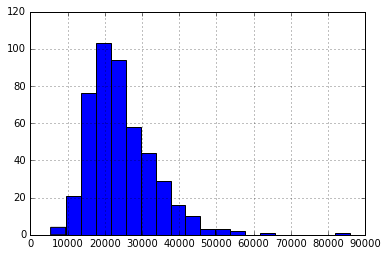

In [48]:
#Create a new Pandas Series called income that contains all the values from the p_income column, except the dashes (-)
#Convert income to an integer type using the astype() method.
income = police_killings['p_income'][police_killings['p_income'] != '-'].astype(float)

#Use the hist() method on income to generate a histogram. Change the number of bins to 20
income.hist(bins=20)

In [49]:
#Here is the median of our income data
income.median()

22348.0

It is obvious from the histogram that the majority, including the median, of Americans shot tend to have a household income less than $25,000 a year. There is almost no representation from the wealthy, whereas only one person was shot who made more than $80,000 a year.

In [50]:
#Some external data from the US Census Bureau
state_pop = pd.read_csv('https://www.census.gov/popest/data/state/asrh/2015/files/SCPRC-EST2015-18+POP-RES.csv')

6     74
48    47
12    29
4     25
40    22
13    16
36    13
8     12
34    11
53    11
22    11
17    11
39    10
29    10
24    10
37    10
26     9
45     9
51     9
41     8
18     8
1      8
42     7
21     7
20     6
27     6
28     6
31     6
47     6
25     5
49     5
55     5
35     5
16     4
15     4
5      4
32     3
30     2
19     2
2      2
54     2
10     2
33     1
9      1
11     1
23     1
56     1
Name: state_fp, dtype: int64


In [53]:
#Use the value_counts() method on the state_fp column of police_killings. Assign the result to counts
counts = police_killings['state_fp'].value_counts()

#We are going to merge datasets on the State column
states = pd.DataFrame({'STATE':counts.index, 'shootings':counts})

states = states.merge(state_pop,on='STATE')
states.columns

Index(['STATE', 'shootings', 'SUMLEV', 'REGION', 'DIVISION', 'NAME',
       'POPESTIMATE2015', 'POPEST18PLUS2015', 'PCNT_POPEST18PLUS'],
      dtype='object')

In [61]:
#Create a new column in states called pop_millions. Assign the result of dividing the POPESTIMATE2015 column 
#by 1000000 to this column. This will give you the population in terms of millions
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000

#Create a new column in states called rate. Assign the result of dividing the shootings column by pop_millions to the rate 
#column. This will give you the rate of police killings per one million people in each state
states['rate'] = states['shootings'] / states['pop_millions']

In [88]:
#It may be useful to try the sort() method on Dataframes to sort states in ascending and descending order to see the states 
#with the most and least police killings per million people

states = states.sort(columns='rate', ascending=False)
states.head(10)

C:\Users\Gerrit\Desktop\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338,5.624674
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065,3.661359
27,31,6,40,2,4,Nebraska,1896190,1425853,75.2,1.896190,3.164240
34,15,4,40,4,9,Hawaii,1431603,1120770,78.3,1.431603,2.794071
39,2,2,40,4,9,Alaska,738432,552166,74.8,0.738432,2.708442
33,16,4,40,4,8,Idaho,1654930,1222093,73.8,1.654930,2.417021
32,35,5,40,4,8,New Mexico,2085109,1588201,76.2,2.085109,2.397956
10,22,11,40,3,7,Louisiana,4670724,3555911,76.1,4.670724,2.355095
7,8,12,40,4,8,Colorado,5456574,4199509,77.0,5.456574,2.199182
41,10,2,40,3,5,Delaware,945934,741548,78.4,0.945934,2.114312


We can see from the dataframe above that the states with the highest shootings per one million people are Oklahoma, Arizona, and Nebraska. The other ten are listed above in the NAME column. These also happen to be very rural states.

In [91]:
police_killings['state'].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
LA    11
IL    11
WA    11
NJ    11
MD    10
OH    10
MO    10
NC    10
SC     9
MI     9
VA     9
AL     8
IN     8
OR     8
KY     7
PA     7
NE     6
MS     6
MN     6
TN     6
KS     6
WI     5
UT     5
MA     5
NM     5
ID     4
HI     4
AR     4
NV     3
MT     2
DE     2
WV     2
AK     2
IA     2
ME     1
CT     1
WY     1
NH     1
DC     1
Name: state, dtype: int64

In [93]:
#Create a new Dataframe called pk where all rows with - values for share_white, share_black, or share_hispanic are removed
pk = police_killings[(police_killings['share_white'] != '-') & (police_killings['share_black'] != '-') & 
                     (police_killings['share_hispanic'] != '-')]

pk['share_white'] = pk['share_white'].astype(float)
pk['share_black'] = pk['share_black'].astype(float)
pk['share_hispanic'] = pk['share_hispanic'].astype(float)

C:\Users\Gerrit\Desktop\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Gerrit\Desktop\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Gerrit\Desktop\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [100]:
top_10_rates = ['OK','AZ', 'NE', 'HI', 'AK', 'ID', 'NM', 'LA', 'CO', 'DE']
bottom_10_rates = ['WI', 'OH', 'IL', 'ME', 'NH', 'MA', 'NY', 'IA', 'PA', 'CT']

high_states = pk[pk['state'].isin(top_10_rates)]
low_states = pk[pk['state'].isin(bottom_10_rates)]

In [103]:
#Comparing the shapes of each of the filtered df's above
print('Shape of high states df', high_states.shape)
print('Shape of low states df', low_states.shape)

Shape of high states df (92, 34)
Shape of low states df (56, 34)


In [105]:
columns = ['pop','county_income', 'share_white', 'share_black', 'share_hispanic']

#Compare the mean value of each column mentioned above across both Dataframes (low_states and high_states)
high_states[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

In [106]:
low_states[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

# State by State rates

We can see from the two analyses done above that the states with the highest police killings rate has lower average county income than the states with the lowest rate of police killings.
Also, states with the lowest rate of police killings has a higher share of white and black people and a lower share of hispanics.
We can also see that the average populations are pretty much the same for both the top 10 and bottom 10 states.

We removed all rows with a - in them for the share columns. What was removed? Did this bias the results?
    
    Yes, this definitely biased the results as we removed data that was not present for some features, but was there for others. Therefore, we were working with a smaller dataset and so our results are less accurate.
    
We're actually looking at columns that contain county-level data for where the shooting occurred. So we're not actually doing a state by state comparison of the columns. This may bias the data, and change what we found. Would the analysis be stronger if we got state-level data for instead of averaging the county-level data in the columns? Why or why not?

    Keeping the analysis at county level may actually be more informative seeing as how average county income varies widely within each state.

# Potential Next Steps

In [ ]:
Explore some of the columns we didn't look at.

Integrate more outside data sources. Here are some ideas:
Data.gov - http://www.data.gov/
Socrata - https://opendata.socrata.com/
Github - https://github.com/caesar0301/awesome-public-datasets
Census Data - https://www.census.gov
    
Map out state-level data in a choropleth map with matplotlib

Look more into the cause column, and see if there are any patterns.
Is there any other data on police brutality that could augment this analysis?

Look more broadly at crime rates where the shootings occured, and see if there are any correlations.